Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

Steps to follow:

1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves
    in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the 
clusters (15 points)
4. Use linear regression model on different clusters separately and print the coefficients of the models 
individually (7.5 points)

In [1]:
%matplotlib inline 

In [2]:
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [3]:
car = pd.read_csv("cars-dataset.csv")
car_df = car.dropna(axis = 0, how ='any') 

In [4]:
car_df.head(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 28.0+ KB


In [6]:
car_med=car_df.median()

In [7]:
car_df.fillna(car_df.median(), inplace=True)

In [8]:
car_df['hp'][car_df['hp']=='?'].count()

6

In [9]:
car_df.loc[car_df['hp'] =='?', 'hp'] = car_med

In [10]:
car_df['hp'][car_df['hp']=='?'].count()

0

In [11]:
car_df['car name'] = car_df['car name'].astype('category')
car_df['hp'] = car_df['hp'].astype('float64')

Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves
in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


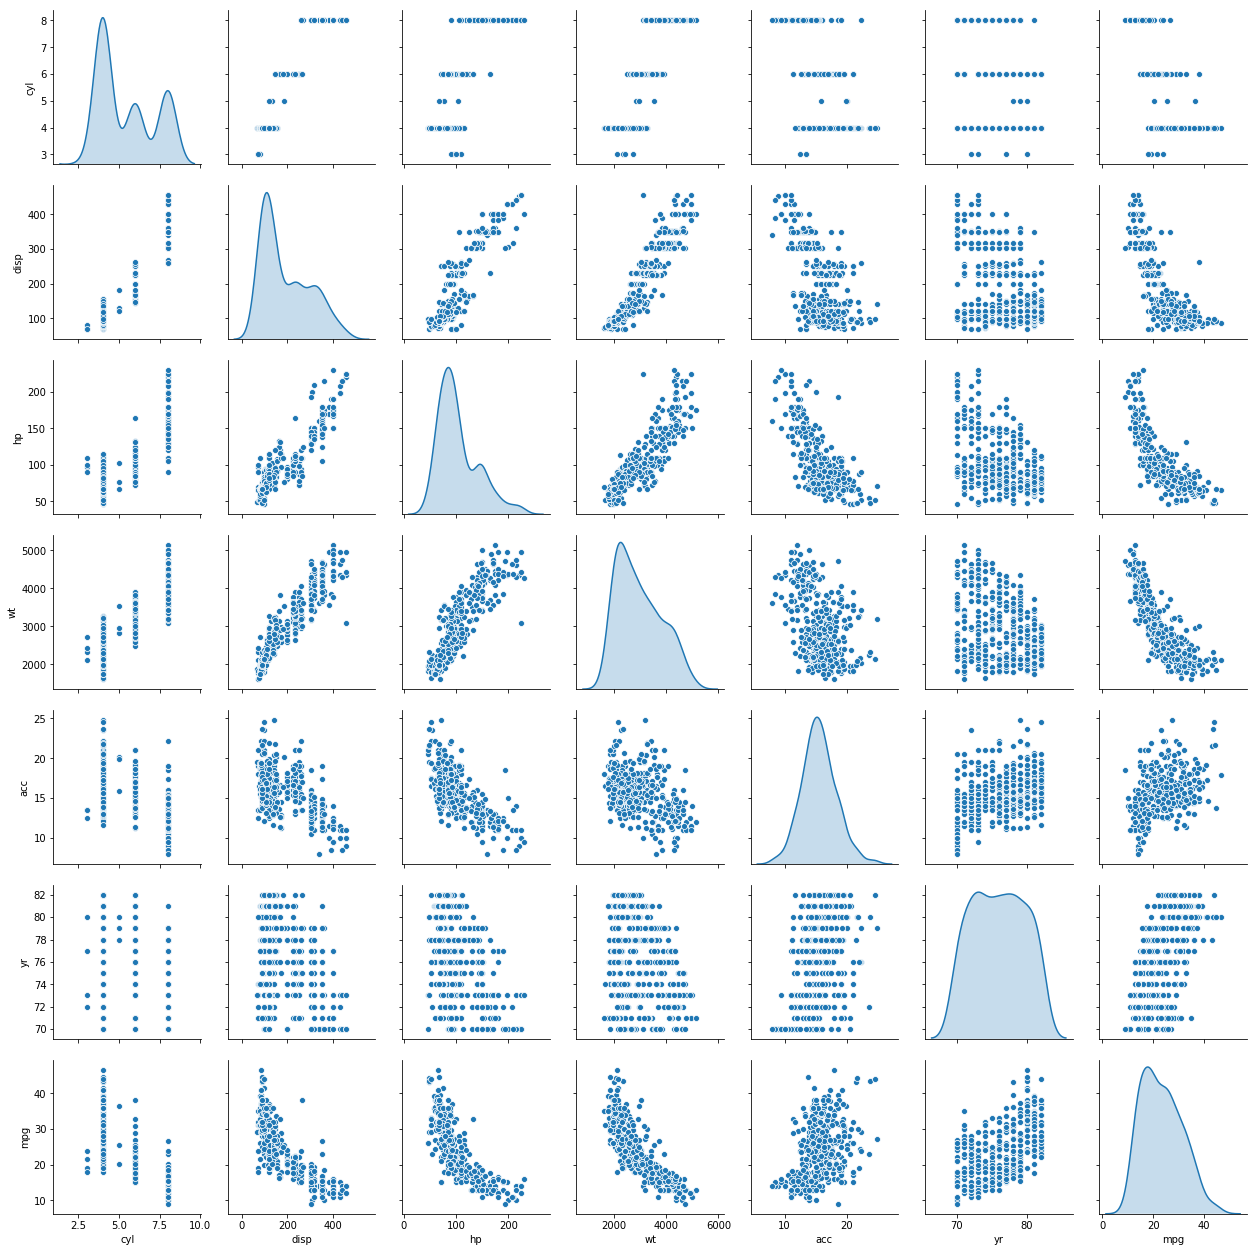

In [12]:
sns.pairplot(car_df,diag_kind='kde')

Cyl -- Three clusters
Disp -- Three cluster
Wt - Two cluster
acc - Almost a normal distribution with a very slight right tail. Seems to be bcz of outliers that is forming a small cluster.
Yr - overlap of two cluster
mpg - two cluster

disp and wt -- positive bend
(disp and mpg) & (wt and mpg) - negative bend


Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [13]:
from scipy.stats import zscore

car_df_attr = car_df.loc[:, 'cyl':'mpg']
car_df_attr_z = car_df_attr.apply(zscore)

In [14]:
car_df.pop('car name')      # Remove "car name" and "yr" columns
car_df.pop('yr')
array = car_df.values

In [15]:
#car_df.apply(lambda x: x.fillna(car_df.median()),axis=0)

In [16]:
car_df.fillna(0,inplace=True)

In [17]:
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_    #number of dimensions
  cluster_errors.append( clusters.inertia_ )  #variance within clusters
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.432360e+07
1,3,3.425184e+07
2,4,1.909213e+07
3,5,1.380170e+07


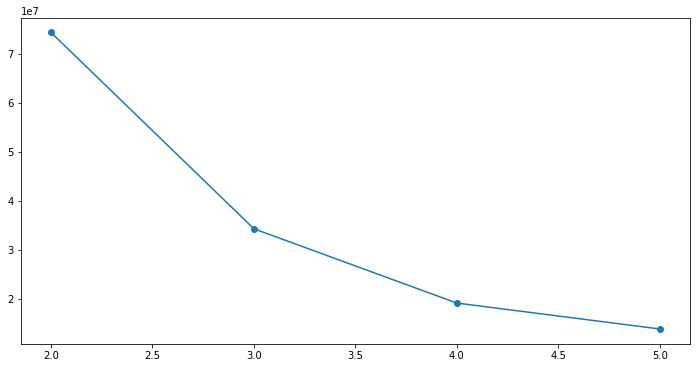

In [18]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

optimal value of K is 4.

Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 6 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
mpg     398 non-null float64
dtypes: float64(4), int64(2)
memory usage: 41.8 KB


In [21]:
X = car_df.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = car_df[['mpg']]


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [24]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.3434691963835388
The coefficient for disp is -0.002394638532805494
The coefficient for hp is -0.02680692976978604
The coefficient for wt is -0.005706987733062265
The coefficient for acc is 0.006350826392748717


In [26]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 45.368012667037135


In [27]:
regression_model.score(X_train, y_train)

0.6842900469961974

In [28]:
regression_model.score(X_test, y_test)

0.7525352641976166

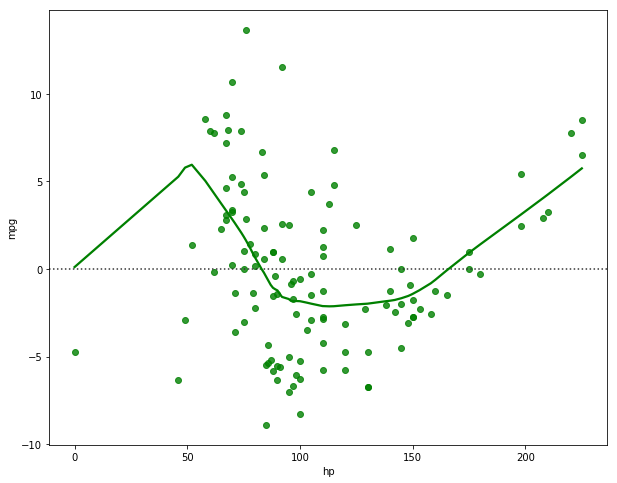

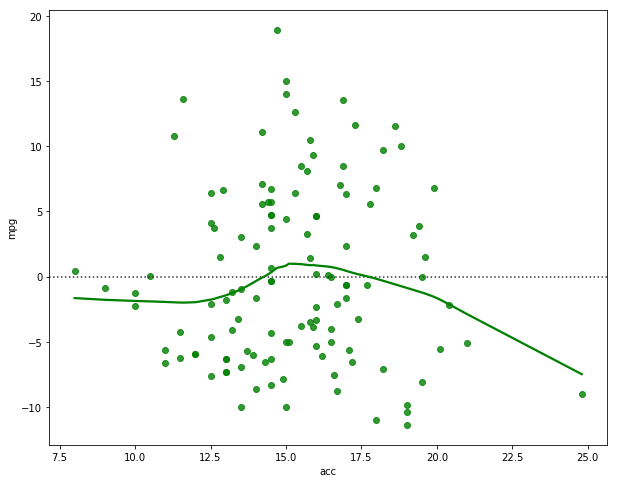

In [29]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['hp'], y= y_test['mpg'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['acc'], y= y_test['mpg'], color='green', lowess=True )